# Сервис GoFast

Популярный сервис аренды самокатов **GoFast** мне передал данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируем данные и проверим некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
без подписки с подпиской **Ultra**.


Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

без подписки:
    
* абонентская плата отсутствует;
* стоимость одной минуты поездки — **8** рублей;
* стоимость старта (начала поездки) — **50** рублей;

с подпиской **Ultra**:

* абонентская плата — **199** рублей в месяц;
* стоимость одной минуты поездки — **6** рублей;
* стоимость старта — **бесплатно**.

In [1]:
import pandas as pd

#### Шаг 1. Загрузка данных

In [2]:
data_users = pd.read_csv('/datasets/users_go.csv')
data_rides = pd.read_csv('/datasets/rides_go.csv')
data_subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')
print(data_users.head())
data_users.info()
print(' ')
print(data_rides.head())
data_rides.info()
print(' ')
print(data_subscriptions.head())
data_subscriptions.info()

   user_id        name  age            city subscription_type
0        1        Кира   22          Тюмень             ultra
1        2   Станислав   31            Омск             ultra
2        3     Алексей   20          Москва             ultra
3        4  Константин   26  Ростов-на-Дону             ultra
4        5       Адель   28            Омск             ultra
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
 
   user_id     distance   duration        date
0        1  4409.919140  25.599769  2021-01-01
1        1  2617.592153  15.816871  2021-01-18

Как мы видим на первый взгляд, данные в целом уже в хорошем виде и готовы к обработке после некоторых шагов. Нет пропусков. Возможны лишь дубликаты

#### Шаг 2. Предобработка данных

##### Приведем столбец date к типу даты pandas и создадим новый столбец с номером месяца на основе столбца date

In [3]:
data_rides['date'] = pd.to_datetime(data_rides['date'], format='%Y-%m-%d')
data_rides['month'] = data_rides['date'].dt.month
data_rides['month'].head()

0    1
1    1
2    4
3    8
4    8
Name: month, dtype: int64

##### Проверим наличие пропущенных значений и дубликатов в датафреймах. Обработаем их, если такие значения присутствуют

In [4]:
data_users.duplicated().sum()

31

In [5]:
data_users = data_users.drop_duplicates()
data_users.duplicated().sum()

0

Далее проведем те же манипуляции с data_rides и data_subscriptions. Благодаря .info() мы видим, что ни в одном из датафреймов нет пропущенных значений

In [6]:
data_rides.duplicated().sum()

0

In [7]:
data_subscriptions.duplicated().sum()

0

Дубликаты встретились нам лишь в одной таблице из трех. Их всего 31, от них можно смело изабвляться. Теперь данные готовы к анализу.

#### Шаг 3. Исследовательский анализ данных

##### Взглянем на частоту встречаемости городов в поездках

In [8]:
print(data_users['city'].value_counts())
data_users['city'].describe()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64


count          1534
unique            8
top       Пятигорск
freq            219
Name: city, dtype: object

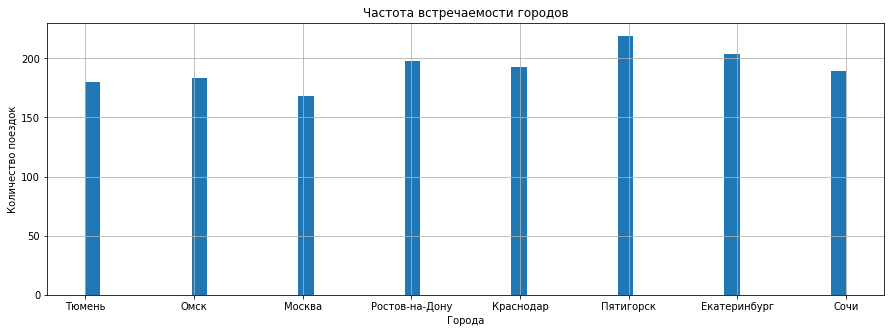

In [9]:
import matplotlib.pyplot as plt

data_users['city'].hist(figsize=(15,5), bins=50)
plt.title('Частота встречаемости городов')
plt.xlabel('Города')
plt.ylabel('Количество поездок')
plt.show()

Пятигорск в лидерах, а Москва отстает. В остальных городах количество поездок распределены равномерно

##### Сравним соотношение пользователей с подпиской и без подписки

Доля поездок с подпиской:  user_id              0.46
name                 0.46
age                  0.46
city                 0.46
subscription_type    0.46
dtype: float64


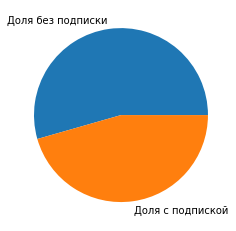

count     1534
unique       2
top       free
freq       835
Name: subscription_type, dtype: object

In [10]:
print('Доля поездок с подпиской: ', (data_users.loc[data_users['subscription_type'] == 'ultra'].count() / data_users['subscription_type'].count()).round(2))
labels = ['Доля без подписки','Доля с подпиской']
plt.pie(data_users['subscription_type'].value_counts(), labels=labels)
plt.show()
data_users['subscription_type'].describe()


In [11]:
print('Доля поездок без подписки: ', (data_users.loc[data_users['subscription_type'] == 'free'].count() / data_users['subscription_type'].count()).round(2))

Доля поездок без подписки:  user_id              0.54
name                 0.54
age                  0.54
city                 0.54
subscription_type    0.54
dtype: float64


45% поездок с подпиской и 54% без подписки

##### Оценим возраст клиентов

25    145
24    132
26    131
23    129
27    119
22    119
28    112
21     93
20     71
30     68
29     68
31     48
19     47
18     46
32     41
33     39
17     26
34     19
16     19
35     15
15     13
14      9
13      8
36      6
12      4
38      3
37      2
39      1
43      1
Name: age, dtype: int64


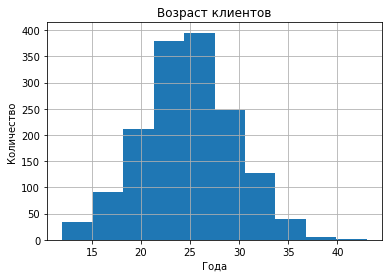

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

In [12]:
print(data_users['age'].value_counts())
data_users['age'].hist()
plt.title('Возраст клиентов')
plt.xlabel('Года')
plt.ylabel('Количество')
plt.show()
data_users['age'].describe()

Самые частые пользователи самокатов: молодые люди 20-30 лет. Возрастые группы старше и младше встречаются реже

##### Посмотрим на расстояние, которое пользователь преодолел за одну поездку

Округлим для начала расстояние до целых

In [13]:
data_rides['distance'] = data_rides['distance'].astype('int')
data_rides['distance']

0        4409
1        2617
2         754
3        2694
4        4028
         ... 
18063    3781
18064    2840
18065    3826
18066    2902
18067    2371
Name: distance, Length: 18068, dtype: int64

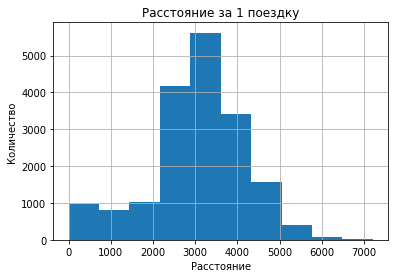

count    18068.000000
mean      3070.159841
std       1116.831548
min          0.000000
25%       2542.750000
50%       3133.000000
75%       3776.000000
max       7211.000000
Name: distance, dtype: float64

In [14]:
data_rides['distance'].hist()
plt.title('Расстояние за 1 поездку')
plt.xlabel('Расстояние')
plt.ylabel('Количество')
plt.show()
data_rides['distance'].describe()

В среднем клиенты проезжают около 3-х километров

##### Рассмотрим продолжительость поездок 

Приведем для начала столбец в надлежащий вид

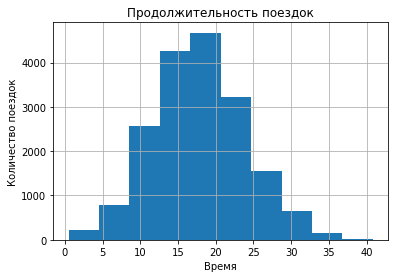

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

In [15]:
data_rides['duration'].hist()
plt.title('Продолжительность поездок')
plt.xlabel('Время')
plt.ylabel('Количество поездок')
plt.show()
data_rides['duration'].describe()

В среднем поездка на самокате занимает около 17 минут

#### Шаг 4. Объединение данных

##### Объединим данные о пользователях, поездках и подписках в один датафрейм.  

In [16]:
data_merge = data_users.merge(data_rides, on='user_id', how='left')
data_merge.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,4409,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,2617,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,754,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,2694,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,4028,26.265803,2021-08-28,8


##### Создадим ещё два датафрейма из датафрейма, созданного на этапе 4.1
- c данными о пользователях без подписки
- c данными о пользователях с подпиской

In [17]:
data_merge_free = data_merge[data_merge['subscription_type'] == 'free']
data_merge_free

,user_id,name,age,city,subscription_type,distance,duration,date,month
6500,700,Айдар,22,Омск,free,2515,14.944286,2021-01-02,1
6501,700,Айдар,22,Омск,free,846,16.234663,2021-02-01,2
6502,700,Айдар,22,Омск,free,4004,20.016628,2021-02-04,2
6503,700,Айдар,22,Омск,free,1205,9.782872,2021-02-10,2
6504,700,Айдар,22,Омск,free,3047,17.427673,2021-02-14,2
...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781,19.822962,2021-11-04,11
18064,1534,Альберт,25,Краснодар,free,2840,21.409799,2021-11-16,11
18065,1534,Альберт,25,Краснодар,free,3826,18.435051,2021-11-18,11
18066,1534,Альберт,25,Краснодар,free,2902,16.674362,2021-11-27,11


In [18]:
data_merge_ultra = data_merge[data_merge['subscription_type'] == 'ultra']
data_merge_ultra

,user_id,name,age,city,subscription_type,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,4409,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,2617,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,754,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,2694,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,4028,26.265803,2021-08-28,8
...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973,24.671163,2021-08-29,8
6496,699,Оксана,22,Москва,ultra,3288,15.892886,2021-09-12,9
6497,699,Оксана,22,Москва,ultra,3076,14.389525,2021-09-26,9
6498,699,Оксана,22,Москва,ultra,4707,15.839579,2021-10-17,10


##### Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий. 

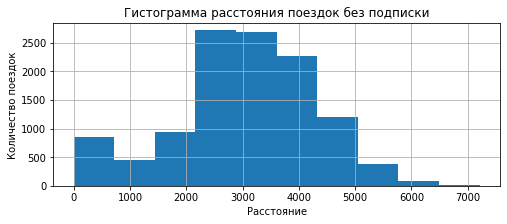

,user_id,age,distance,duration,month
count,11568.000000,11568.000000,11568.000000,11568.000000,11568.000000
mean,1120.527230,24.893326,3044.992911,17.390909,6.522994
std,241.165628,4.481100,1246.174341,6.326803,3.449770
min,700.000000,12.000000,0.000000,0.500000,1.000000
25%,915.000000,22.000000,2366.000000,12.958437,4.000000
50%,1123.000000,25.000000,3114.000000,17.326890,7.000000
75%,1328.000000,28.000000,3905.000000,21.594071,9.000000
max,1534.000000,43.000000,7211.000000,34.948498,12.000000


In [19]:
data_merge_free['distance'].hist(figsize=(8,3)) #смотрим на гистограмму расстояния поездок без подписки
plt.title('Гистограмма расстояния поездок без подписки')
plt.xlabel('Расстояние')
plt.ylabel('Количество поездок')
plt.show()
data_merge_free.describe()

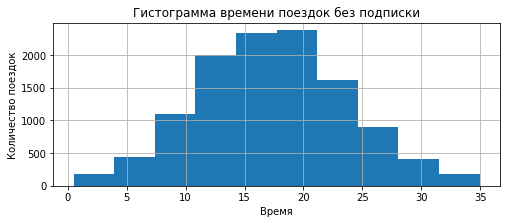

In [20]:
data_merge_free['duration'].hist(figsize=(8,3)) #смотрим на гистограмму времени поездок без подписки
plt.title('Гистограмма времени поездок без подписки')
plt.xlabel('Время')
plt.ylabel('Количество поездок')
plt.show()

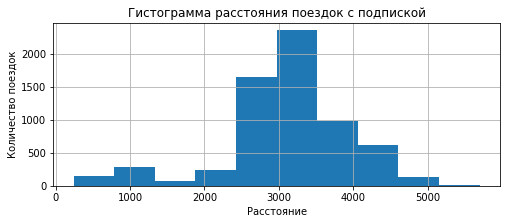

,user_id,age,distance,duration,month
count,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000
mean,348.725385,24.892615,3114.949231,18.541985,6.422308
std,201.099339,4.757208,836.894838,5.572048,3.414616
min,1.000000,12.000000,244.000000,3.760353,1.000000
25%,175.000000,22.000000,2785.000000,14.524654,4.000000
50%,351.000000,25.000000,3148.000000,18.178153,6.000000
75%,525.000000,28.000000,3560.000000,21.884129,9.000000
max,699.000000,38.000000,5699.000000,40.823963,12.000000


In [21]:
data_merge_ultra['distance'].hist(figsize=(8,3)) #смотрим на гистограмму расстояния поездок c подпиской
plt.title('Гистограмма расстояния поездок c подпиской')
plt.xlabel('Расстояние')
plt.ylabel('Количество поездок')
plt.show()
data_merge_ultra.describe()

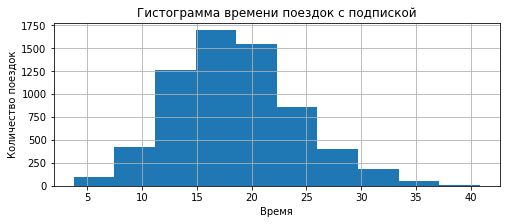

In [22]:
data_merge_ultra['duration'].hist(figsize=(8,3)) #смотрим на гистограмму времени поездок с подпиской
plt.title('Гистограмма времени поездок с подпиской')
plt.xlabel('Время')
plt.ylabel('Количество поездок')
plt.show()

Как мы можем заметить по гистограммам и информации о данных, существуют различия в показателях пользователей с подпиской и без. Так визуально пользователи с подпиской проезжают расстояние больше в поездках, чем пользователи без подписки. А времени трятят приблизительно одинаково (формы распределенний похожи)

#### Шаг 5. Подсчёт выручки

##### Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. 

In [23]:
data_merge['duration'] = data_merge['duration'].astype('int')

In [24]:
aggfunction = {
    'distance':['sum','count'],
    'duration':['sum'],
    'subscription_type':['min']
}
dataset = data_merge.groupby(['user_id','name','month']).agg(aggfunction)
dataset.head(20)

distance       duration subscription_type
                             sum count      sum               min
user_id name      month                                          
1       Кира      1         7026     2       40             ultra
                  4          754     1        6             ultra
                  8         6722     2       44             ultra
                  10        5809     2       30             ultra
                  11        7002     3       53             ultra
                  12        6751     2       26             ultra
2       Станислав 3        10187     3       60             ultra
                  4         6163     2       38             ultra
                  6         3255     1       13             ultra
                  7         6779     2       46             ultra
                  8          923     1        6             ultra
                  10        2824     1       18             ultra
                  12        3828     1       11             ultra
3       Алексей   1         3061     1       12             ultra
                  2         5420     2       37             ultra
                  4         2956     1       20             ultra
                  5         9062     3       60             ultra
                  7        10918     3       64             ultra
                  9         2891     1       22             ultra
                  12        2593     1       12             ultra

In [25]:
dataset.columns

MultiIndex([(         'distance',   'sum'),
            (         'distance', 'count'),
            (         'duration',   'sum'),
            ('subscription_type',   'min')],
           )

Переименуем столбцы для удобства работы с ними

In [26]:
dataset.columns = ['sum_distance', 'rides_count','duration_sum', 'subscription_type']
dataset

sum_distance  rides_count  duration_sum  \
user_id name    month                                            
1       Кира    1              7026            2            40   
                4               754            1             6   
                8              6722            2            44   
                10             5809            2            30   
                11             7002            3            53   
...                             ...          ...           ...   
1534    Альберт 6              3409            2            24   
                8              7621            2            46   
                9              4928            1            22   
                11            13349            4            74   
                12             2371            1            15   

                      subscription_type  
user_id name    month                    
1       Кира    1                 ultra  
                4                 ultra  
                8                 ultra  
                10                ultra  
                11                ultra  
...                                 ...  
1534    Альберт 6                  free  
                8                  free  
                9                  free  
                11                 free  
                12                 free  

[11331 rows x 4 columns]

##### В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь. 

Округлим к "потолку" данные о продолжительности поездки и превратим в целочисленный тип

In [27]:
import numpy as np

dataset['duration_sum'] = np.ceil(dataset['duration_sum'])
dataset['duration_sum'] = dataset['duration_sum'].astype('int')
dataset['duration_sum']

user_id  name     month
1        Кира     1        40
                  4         6
                  8        44
                  10       30
                  11       53
                           ..
1534     Альберт  6        24
                  8        46
                  9        22
                  11       74
                  12       15
Name: duration_sum, Length: 11331, dtype: int64

In [28]:
dataset = dataset.merge(data_subscriptions, on='subscription_type', how='left')
dataset

,sum_distance,rides_count,duration_sum,subscription_type,minute_price,start_ride_price,subscription_fee
0,7026,2,40,ultra,6,0,199
1,754,1,6,ultra,6,0,199
2,6722,2,44,ultra,6,0,199
3,5809,2,30,ultra,6,0,199
4,7002,3,53,ultra,6,0,199
...,...,...,...,...,...,...,...
11326,3409,2,24,free,8,50,0
11327,7621,2,46,free,8,50,0
11328,4928,1,22,free,8,50,0
11329,13349,4,74,free,8,50,0


Тут мы объединили полученную агрегированную таблицу с условиями подписки. Теперь можем рассчитать выручку

In [29]:
dataset['revenue'] = dataset['start_ride_price']*dataset['rides_count'] + dataset['minute_price']*dataset['duration_sum'] + dataset['subscription_fee']
dataset

,sum_distance,rides_count,duration_sum,subscription_type,minute_price,start_ride_price,subscription_fee,revenue
0,7026,2,40,ultra,6,0,199,439
1,754,1,6,ultra,6,0,199,235
2,6722,2,44,ultra,6,0,199,463
3,5809,2,30,ultra,6,0,199,379
4,7002,3,53,ultra,6,0,199,517
...,...,...,...,...,...,...,...,...
11326,3409,2,24,free,8,50,0,292
11327,7621,2,46,free,8,50,0,468
11328,4928,1,22,free,8,50,0,226
11329,13349,4,74,free,8,50,0,792


Мы получили помесячную выручку каждого пользователя. Ради интереса посмотрим на суммарную выручку


In [30]:
dataset['revenue'].sum()

3747097

#### Шаг 6. Проверка гипотез

##### Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверим гипотезу. 

Смормулируем нулевую гипотезу: пользователи с подпиской тратят примерно столько же времени на поездки, что и пользователи без подписки.
Альтернативная гипотеза будет звучать так: пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки. Это правосторонняя гипотеза. 
Обозначим уровень статистической значимости в 5%
Для начала рассчитаем среднее количество затраченного времени на поездки пользователей без подписки, чтобы с этим значением сравнить нашу гипотезу

In [31]:
from scipy import stats as st

#ожидаемое среднее значение затраченного времени на поездки пользователей без подписки
free_value = data_merge_free['duration']

ultra = data_merge_ultra['duration'] #серия проверяемых в гипотезе чисел: время поездки с подпиской

alpha = 0.05 #уровень критической значимости

result_1 = st.ttest_ind(
    ultra,
    free_value,
    alternative='greater'
                                  )
print('p-значение:', result_1.pvalue)

if (result_1.pvalue < alpha): #сравним полученный p-value и уровень значимости)
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 
    

p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


Значит, мы приходим к выводу, что пользователи с подпиской тратят больше времени на поездки, чем в среднем пользователи без подписки. Это определенно стоит учитывать продакт-менеджерам

##### Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее  расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?

Сформулируем нулевую гипотезу: среднее расстояние поездки пользователей с подпиской не превышает 3130 метров.
Альтернативная гипотеза: среднее расстояние поездки пользователей с подпиской превышает 3130 метров. Это правосторонняя гиптоза.
Обозначим уровень критической значимости 5%


In [32]:
distance = 3130 #расстояние поездки оптимальное для износа

aplha = 0.05 #уровень критической значимости

distance_ultra = data_merge_ultra['distance']

result_2 = st.ttest_1samp(
    distance_ultra,
    distance,
    alternative='greater'
                                  )
print('p-значение:', result_2.pvalue)

if (result_2.pvalue < alpha): #сравним полученный p-value и уровень значимости)
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 
    


p-значение: 0.9264356652998772
Не получилось отвергнуть нулевую гипотезу


Значит, мы приходим к выводу, что пользователи с подпиской проезжают в среднем не больше 3130 метров, а следовательно, самокаты у таких пользователей будут менее подвержены износам

##### Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.  

Сформулируем нулевую гипотезу: помесячная выручка пользователей с подпиской не превышает помесячную выручку пользователей без подписки. Альтернативная гипотеза: помесячная выручка пользователей с подпиской больше помесячной выручки пользователей без подписки. Обозначим уровень критической значимости 5%

In [33]:
revenue_ultra = dataset[dataset['subscription_type'] == 'ultra']['revenue'] #выручка с подпиской
revenue_free = dataset[dataset['subscription_type'] == 'free']['revenue'] #выручка без подписки

aplha = 0.05 #уровень критической значимости

result_3 = st.ttest_ind(revenue_ultra, revenue_free, alternative = 'greater')

print('p-значение:', result_3.pvalue)

if result_3.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')



p-значение: 1.1914705742669238e-43
Отвергаем нулевую гипотезу


Это значит, что пользователи с подпиской приносят больше выручки, нежели пользователи без подписки

##### Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы? 

Поскольку обращения пользователей в техподдержку до и после обновления - величины зависимые, то следует проверить гипотезу о равенстве средних для зависимых (парных) выборок с помощью метода scipy.stats.ttest_rel(). То есть провести двухвыборочный t-тест для зависимых выборок

#### Шаг 7. Распределения

Ввиду того, что дедлайн уже на носу, к 7 заданию постараюсь вернуться позже)
Не вижу в задании пункта с общим выводом, следовательно, общий вывод в данном проекте не обязателен

# Общий вывод

Проведя анализ данных и проверив некоторые гипотезы, вот к какими выводам мы пришли и вот, что нужно знать продакт-менеджерам:

1. При исследовательском анализе данных мы выяснили:
    - Больше всего поездок в Пятигорске, а Москва отстает. В остальных городах количество поездок распределены равномерно
    - Доля клиентов с подпиской **45%** и **54%** без подписки
    - Самые частые пользователи самокатов: молодые люди **20-30** лет. Возрастые группы старше и младше встречаются реже
    - В среднем клиенты проезжают около **3-х километров**
    - В среднем поездка на самокате занимает около **17 минут**
    
2. При визуализации данных мы выяснили следующее:
    По гистограммам и информации о данных, существуют различия в показателях пользователей с подпиской и без. Так визуально **пользователи с подпиской проезжают расстояние больше в поездках, чем пользователи без подписки**. А времени трятят приблизительно одинаково (формы распределенний схожи)
    
3. Рассчитав помесяную выручку мы сформулировали несколько гипотез и вот, что мы смогли подтвердить:
    - Пользователи с подпиской тратят больше времени на поездки, чем в среднем пользователи без подписки. Это определенно стоит учитывать продакт-менеджерам
    - Пользователи с подпиской проезжают в среднем не больше **3130 метров**, а следовательно, самокаты у таких пользователей будут менее подвержены износам
    - Пользователи с подпиской приносят больше выручки, нежели пользователи без подписки
    
Пользователи с подпиской опредленно **выгодны** сервису самокатов, а следовательно, кампании по привлечению клиентов с подпиской должны увеличить прибыль сервиса. Продакт-менеджерам теперь можно уверенно дейстовать.